### checking overall stats

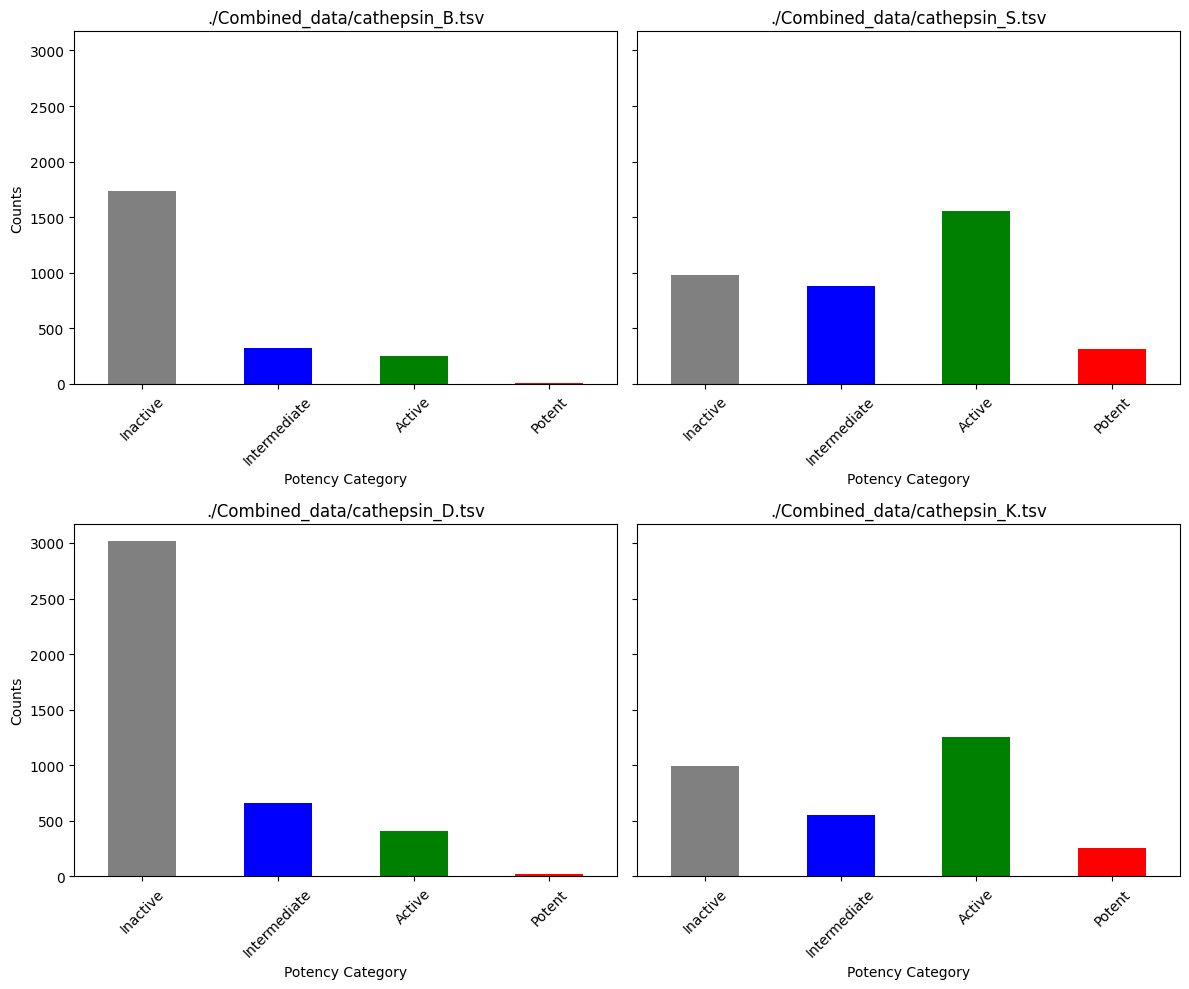

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File names and importance categories
file_names = ['./Combined_data/cathepsin_B.tsv', './Combined_data/cathepsin_S.tsv', './Combined_data/cathepsin_D.tsv', './Combined_data/cathepsin_K.tsv']
importance = {0: 'Inactive', 1: 'Intermediate', 2: 'Active', 3: 'Potent'}

# Initialize a dictionary to store counts for each file
all_counts = {}

# Process each file
for file in file_names:
    if os.path.exists(file):
        # Read the TSV file
        data = pd.read_csv(file, sep='\t')

        # Count the occurrences of each potency value
        counts = data['Potency'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

        # Map the potency values to their importance
        counts.index = counts.index.map(importance)

        # Store the counts for the file
        all_counts[file] = counts
    else:
        print(f"File not found: {file}")

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()

for i, (file, counts) in enumerate(all_counts.items()):
    ax = axes[i]
    counts.plot(kind='bar', ax=ax, color=['gray', 'blue', 'green', 'red'])
    ax.set_title(file)
    ax.set_xlabel('Potency Category')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(counts.index, rotation=45)

plt.tight_layout()
plt.show()


### SMILES to diagram

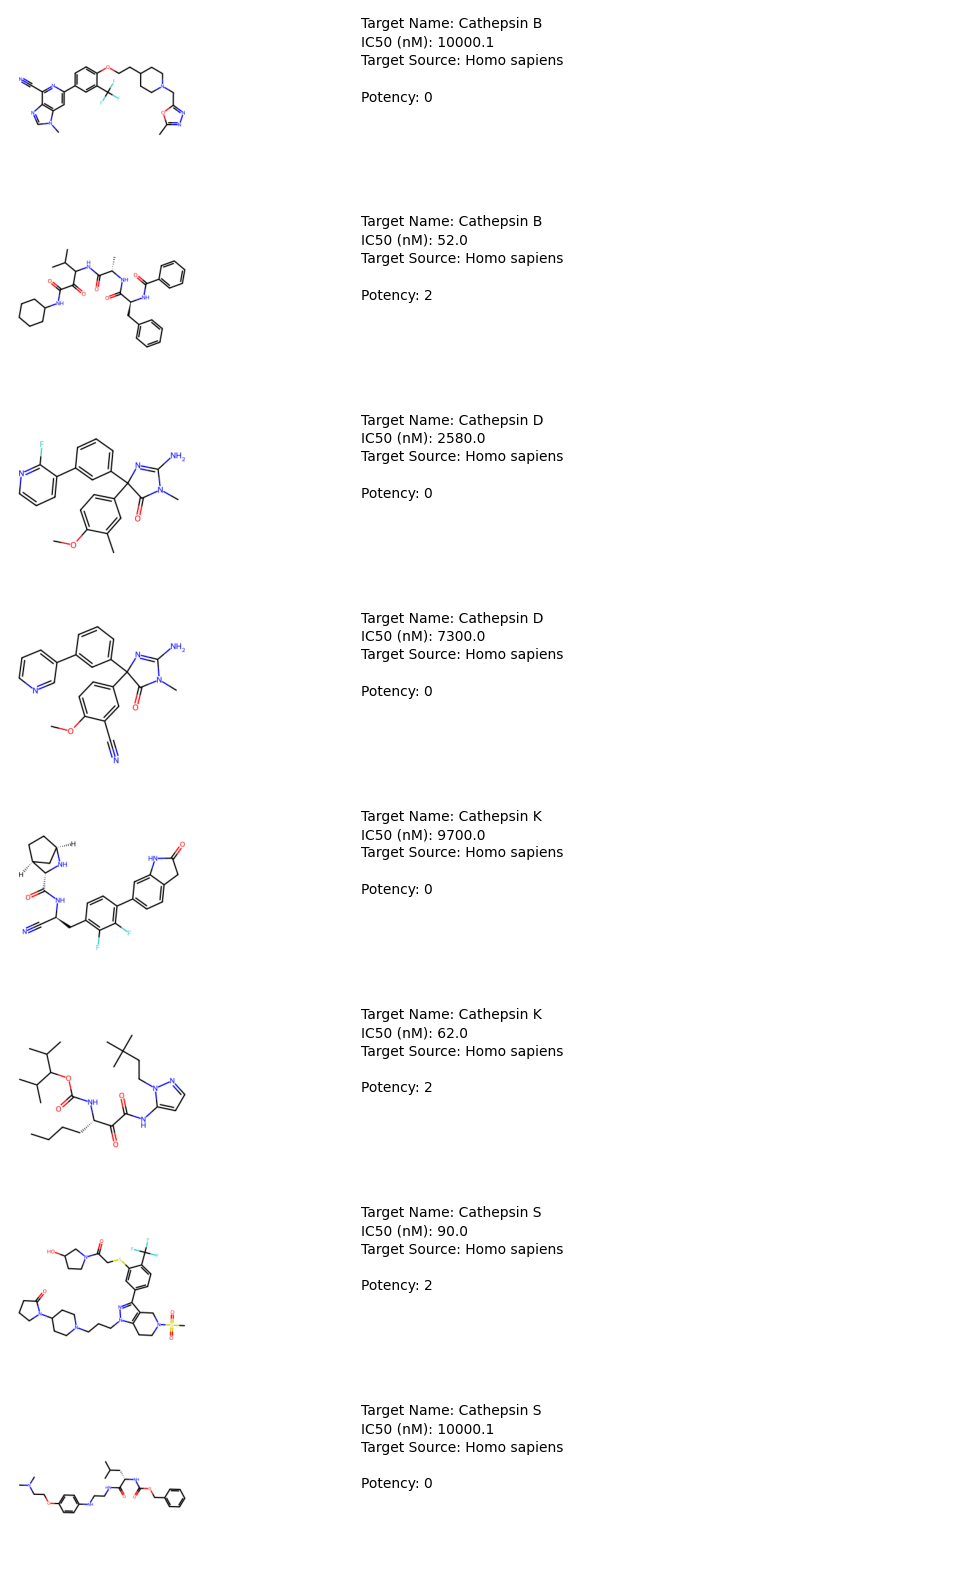

In [4]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

# Directory containing the TSV files
combined_data_dir = './Combined_data'  # replace with your directory path

# Function to read all TSV files from the directory and randomly select 5 rows from each
def process_files(directory):
    data = []
    files = [f for f in os.listdir(directory) if f.endswith('.tsv')]

    for file in files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, sep='\t')
        selected_rows = df.sample(n=2, random_state=48)
        data.append(selected_rows)

    return pd.concat(data, ignore_index=True)

# Function to create molecular images from SMILES
def create_molecular_image(smiles_list):
    mol_images = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        img = Draw.MolToImage(mol, size=(300, 300))
        mol_images.append(img)
    return mol_images

# Function to display table and molecular images
def display_data_with_images(data):
    # Extracting relevant columns
    data_to_display = data[['Target Name', 'IC50 (nM)', 'Target Source Organism According to Curator or DataSource', 'Ligand SMILES', 'Potency']]

    # Create molecular images
    mol_images = create_molecular_image(data['Ligand SMILES'])

    # Create a plot to display images and data
    fig, axs = plt.subplots(len(data), 2, figsize=(12, len(data) * 2))

    for i, (row, img) in enumerate(zip(data_to_display.itertuples(), mol_images)):
        # Plot the image on the left
        axs[i, 0].imshow(img)
        axs[i, 0].axis('off')

        # Plot the data on the right
        axs[i, 1].axis('off')
        axs[i, 1].text(0.1, 0.9, f'Target Name: {row[1]}', fontsize=10, ha='left')
        axs[i, 1].text(0.1, 0.8, f'IC50 (nM): {row[2]}', fontsize=10, ha='left')
        axs[i, 1].text(0.1, 0.7, f'Target Source: {row[3]}', fontsize=10, ha='left')
        # axs[i, 1].text(0.1, 0.6, f'Ligand SMILES: {row[4]}', fontsize=10, ha='left')
        axs[i, 1].text(0.1, 0.5, f'Potency: {row[5]}', fontsize=10, ha='left')

    plt.tight_layout()
    plt.show()

# Main function to run the script

data = process_files(combined_data_dir)
display_data_with_images(data)


